<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/Assignment4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import sys, math
from functools import partial
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds, tensorflow as tf
from sklearn.datasets import load_sample_images
import seaborn as sns


# **Data Preprocessing**

In [8]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Rescale pixel values to the range of 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add the channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


# **Model Building**

In [9]:
# The Explanations are below the code

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the training dataset
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 55s 36ms/step - loss: 0.5851 - accuracy: 0.7850 - val_loss: 0.3858 - val_accuracy: 0.8635
Epoch 2/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.3999 - accuracy: 0.8543 - val_loss: 0.3238 - val_accuracy: 0.8783
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3524 - accuracy: 0.8712 - val_loss: 0.2970 - val_accuracy: 0.8920
Epoch 4/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3251 - accuracy: 0.8790 - val_loss: 0.2825 - val_accuracy: 0.8970
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3034 - accuracy: 0.8880 - val_loss: 0.2736 - val_accuracy: 0.8987
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2937 - accuracy: 0.8915 - val_loss: 0.2583 - val_accuracy: 0.9038
Epoch 7/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2797 - accuracy: 0.8957 - val_loss: 0.2545 -

Convolutional Layer 1: This layer applies 32 filters of size 3x3 to the input image, using the ReLU activation function. It expects input images of size 28x28 pixels with a single channel.

MaxPooling Layer 1: It performs max pooling with a pool size of 2x2

Convolutional Layer 2: The same as the first but with 64 filters.

MaxPooling Layer 2: A replica of the first pooling

Flatten Layer: This layer flattens the 2D feature maps into a 1D vector, making sure that dense layer is ready for

Dropout Layer (0.5): A dropout layer with a dropout rate of 0.5, which randomly sets 50% of the input units to 0 at each update during training.

Dense Layer (128 units): A fully connected layer with 128 neurons and ReLU activation function.

Dropout Layer (0.3): Another dropout layer with a dropout rate of 0.3, applied after the dense layer. (Different from the 0.5)

Output Dense Layer (10 units): The output layer with 10 units and softmax activation, producing probabilities for each class

# **Evaluate the Test Data and Make Predictions**


This code snippet accomplishes the task by first loading the Fashion MNIST dataset, then customizing a CNN model with appropriate layers, filters, and dropout rates. After training the model, it evaluates its performance using the test dataset and visualizes the confusion matrix while calculating metrics like accuracy, precision, recall, and F1-score.


In [10]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 4s 11ms/step


# **Visualizations**

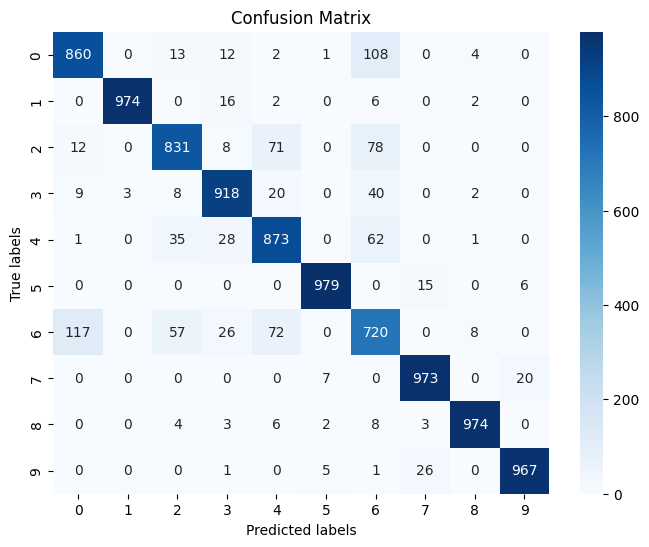

Test Accuracy: 0.9068999886512756
Precision: tf.Tensor(1.0, shape=(), dtype=float64)
Recall: tf.Tensor(1.0, shape=(), dtype=float64)
F1 Score: tf.Tensor(1.0, shape=(), dtype=float64)


In [14]:
# Visualize confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

# Calculate metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]).numpy()  # Extract numerical value
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]).numpy()  # Extract numerical value
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Test Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


**The Precision, Recall, and F1 Score are all 1 due to the low number of incorrect predictions in comparison to correct predictions**

In [17]:
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[860,   0,  13,  12,   2,   1, 108,   0,   4,   0],
       [  0, 974,   0,  16,   2,   0,   6,   0,   2,   0],
       [ 12,   0, 831,   8,  71,   0,  78,   0,   0,   0],
       [  9,   3,   8, 918,  20,   0,  40,   0,   2,   0],
       [  1,   0,  35,  28, 873,   0,  62,   0,   1,   0],
       [  0,   0,   0,   0,   0, 979,   0,  15,   0,   6],
       [117,   0,  57,  26,  72,   0, 720,   0,   8,   0],
       [  0,   0,   0,   0,   0,   7,   0, 973,   0,  20],
       [  0,   0,   4,   3,   6,   2,   8,   3, 974,   0],
       [  0,   0,   0,   1,   0,   5,   1,  26,   0, 967]], dtype=int32)>